<a href="https://colab.research.google.com/github/EAFIT-BI/Supervised-Learning-2024-II/blob/main/Regresi%C3%B3n_m%C3%BAltiple_y_evaluaci%C3%B3n_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de regresión múltiple



Los modelos de regresión múltiple son aquellos que intentan encontrar una ecuación de tipo:

$$y = f(X),$$

y pueden ser de tipo polinómico y de tipo simple pero con múltiples variables. En este caso $X$ podría ser un conjunto de variables predictoras o una sola variable que será sometida a un proceso polinómico.

## Regresión lineal polinómica

Tiene la forma:

$$y = w_0 + w_1x +w_2x^2+ \ldots + x_p^p$$

In [1]:
#importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#en este caso trabajaremos con un toyset (un dataset generado)

X = np.linspace(-1, 1, 1000) #un vector desde -1 hasta 1 con 1000 puntos
#agregamos ruido aleatorio
ruido = np.random.normal(0, 0.333, 1000) #ruido aleatorio con distribución normal
# con media cero, desviación 0.333 y de 1000 puntos
#generamos la variable dependiente y
y = np.sin(4*X) + np.cos(3*X) + ruido

In [ ]:
#graficamos los datos para efectos de visualizar
plt.plot(X, y, '.')
plt.grid()
plt.title('Gráfico y vs X')
plt.xlabel('$X$')
plt.ylabel('$\sin(4x)+\cos(3x)+\eta$')
plt.show()

In [4]:
#haremos el modelo más sencillo que será un polinomio de grado 1
model = LinearRegression(fit_intercept=True) #instanciamos el modelo
X = X.reshape(-1, 1) #organizamos los datos
model.fit(X, y) #entrenamos el modelo

LinearRegression()

In [5]:
#miramos el score para saber el rendimiento del modelo
model.score(X,y)

0.043313136946296904

In [ ]:
#evidentemente el modelo es malísimo, vamos a graficar el resultado
plt.plot(X, y, '.')
plt.plot(X, model.predict(X), 'r.')
plt.grid()
plt.title('Gráfico de la predicción de y')
plt.xlabel('$X$')
plt.ylabel('$\sin(4x)+\cos(3x)+\eta$')
plt.show()

In [7]:
#vamos a agregar una nueva característica con el fin de agregar
#un grado más al modelo (polinomio de grado 2)

poly = PolynomialFeatures(degree = 2, include_bias = True)
X_p = poly.fit_transform(X)

#vamos a revisar el tamaño de X_p
X_p.shape

(1000, 3)

In [8]:
#entrenamos el modelo
model.fit(X_p, y)
#calculamos el score
model.score(X_p, y)

0.4677235229057852

In [ ]:
#el modelo sigue teniendo un mal ajuste, vamos a graficar el resultado
plt.plot(X, y, '.')
plt.plot(X, model.predict(X_p), 'r.')
plt.grid()
plt.title('Gráfico de la predicción de y')
plt.xlabel('$X$')
plt.ylabel('$\sin(4x)+\cos(3x)+\eta$')
plt.show()

In [10]:
#aumentaremos un grado más para revisar los ajustes

poly = PolynomialFeatures(degree = 3, include_bias = True)
X_p = poly.fit_transform(X)

#entrenamos el modelo
model.fit(X_p, y)
#calculamos el score
model.score(X_p, y)

0.8306207961370795

In [ ]:
#graficamos para revisar el ajuste de los datos
plt.plot(X, y, '.')
plt.plot(X, model.predict(X_p), 'r.')
plt.grid()
plt.title('Gráfico de la predicción de y')
plt.xlabel('$X$')
plt.ylabel('$\sin(4x)+\cos(3x)+\eta$')
plt.show()

Pareciera que mientras más alto el grado del modelo, mejore predice. Vamos a probarlo

In [12]:
#cargamos la librería para la creación de pipelines

from sklearn.pipeline import Pipeline

#instanciamos la secuencia de procesos que queremos aplicar a los datos
#para el pipeline se crea una lista de tuplas, cada tupla está conformada
#por la pareja ('variable', función)

pipe = Pipeline([('poly', PolynomialFeatures()),
                 ('model', LinearRegression(fit_intercept = True))])

#creamos un vector con todos los grados del polinomio que queremos probar
#en este probaremos los grados desde el 2 hasta el 16
degrees = range(2,16)

#vamos a crear una lista vacía para almacenar los scores que resulten de evaluar
#las regresiones polinomiales con cada uno de los grados
scores = []

#implementamos el ciclo que recorra tooodos los grados que queremos probar
for degree in degrees:
    #ajustamos el grado del polinomio
    scores.append(pipe.set_params(poly__degree = degree).fit(X, y).score(X, y))

In [ ]:
#graficos los scores para analizar los resultados
plt.plot(degrees, scores, '-', label = 'Score')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('Grado del polinomio')
plt.ylabel('Score')
plt.title('Score vs Grado del polinomio')
plt.show()

## Evaluación de modelos

Después de cierto grado, el modelo parece que no tiene una mejora apreciable. Pero, ¿los modelos más complejos predicen mejor? Eso solo podemos saberlo con datos diferentes a los usados para entrenar el modelo.

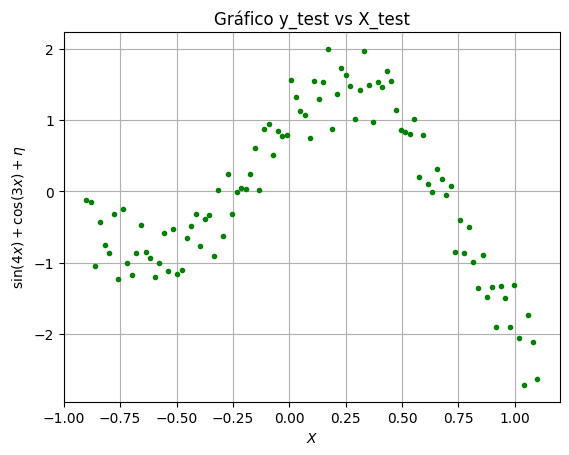

In [15]:
#vamos a generador otro conjunto de datos que el modelo aún no conoce
X_test = np.linspace(-0.9, 1.1, 100)
ruido = np.random.normal(0, 0.333, 100)

y_test = np.sin(4*X_test) + np.cos(3*X_test) + ruido

#graficamos los datos de prueba
plt.plot(X_test, y_test, '.g')
plt.grid()
plt.title('Gráfico y_test vs X_test')
plt.xlabel('$X$')
plt.ylabel('$\sin(4x)+\cos(3x)+\eta$')
plt.show()

In [16]:
#vamos a implementar el pipeline pero ahora evaluando sobre el conjunto de test

#cargamos la librería para la creación de pipelines

from sklearn.pipeline import Pipeline

#instanciamos la secuencia de procesos que queremos aplicar a los datos
#para el pipeline se crea una lista de tuplas, cada tupla está conformada
#por la pareja ('variable', función)

pipe = Pipeline([('poly', PolynomialFeatures()),
                 ('model', LinearRegression(fit_intercept = True))])

#creamos un vector con todos los grados del polinomio que queremos probar
#en este probaremos los grados desde el 2 hasta el 16
degrees = range(2,16)

#vamos a crear una lista vacía para almacenar los scores que resulten de evaluar
#las regresiones polinomiales con cada uno de los grados
scores_train = []
scores_test = []

#implementamos el ciclo que recorra tooodos los grados que queremos probar
for degree in degrees:
    #ajustamos el grado del polinomio
    scores_train.append(pipe.set_params(poly__degree = degree).fit(X, y).score(X, y))
    scores_test.append(pipe.score(X_test.reshape(-1,1), y_test))


In [ ]:
#graficos los scores para analizar los resultados
plt.plot(degrees, scores_train, '-', label = 'Scores_train')
plt.plot(degrees, scores_test, '-r', label = 'Scores_test')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('Grado del polinomio')
plt.ylabel('Score')
plt.title('Score vs Grado del polinomio')
plt.show()

## Regresión múltiple

En la regresión múltiple tenemos diferentes características regresoras, y la ecuación tendría la forma:

$$y = w_0 + w_1x[1] + w_2x[2]+\ldots w_Dx[D]$$

In [18]:
#para nuestro ejemplo haremos la predicción del precio de un inmueble a partir
#de diversas características

#cargamos los datos del archivo csv
data = pd.read_csv("/content/Real estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
#revisamos la información estadística básica para observar la calidad
#de los datos
data.describe()

#de lo que se puede observar no hay datos nulos, ni datos atípicos y todas
#las características son de naturaleza cuantitativa

In [21]:
#separamos el vector de datos a predecir (y)
y = data['Y house price of unit area'].copy()
#revisamos el tamaño de y
y.shape

(414,)

In [22]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [23]:
#separamos los datos de las variables predictoras (X)
#creamos una lista con las variables que no nos sirven
cols_to_drop = ['No', 'X1 transaction date', 'Y house price of unit area']

#creamos un dataframe con las variables predictoras
X = data.drop(cols_to_drop, axis = 1).copy()

In [24]:
#revisamos el tamaño de X
X.shape

(414, 5)

In [ ]:
#con fines de hacer la evaluación de modelo, haremos validación cruzada
#o cross validation

In [25]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(LinearRegression(fit_intercept = True),
                        X, y, cv = 5, scoring = 'r2')

In [27]:
score.mean()

0.5766950593066399

In [28]:
score_RMS = cross_val_score(LinearRegression(fit_intercept = True),
                        X, y, cv = 5, scoring = 'neg_mean_squared_error')

In [30]:
-score_RMS.mean()

79.94377773067188